In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import cv2

In [44]:
c = 1.0
epsilon0 = 1.0
mu_0 = 1.0 / (epsilon0 * c**2)
m_unit = 1.0
r_m = 1 / 25
m_electron = 1 * m_unit
m_ion = m_electron / r_m
t_r = 1.0/1.0
r_q = 1.0
n_e = 10 #ここは手動で調整すること
B0 = np.sqrt(n_e) / 1.0 / np.sqrt(2/(1+t_r))
n_i = int(n_e / r_q)
T_i  = (B0**2 / 2.0 / mu_0) / (n_i + n_e * t_r)
T_e = T_i * t_r
debye_length = 1.0
q_unit = np.sqrt(epsilon0 * T_e / n_e) / debye_length
q_electron = -1 * q_unit
q_ion = r_q * q_unit
debye_length = np.sqrt(epsilon0 * T_e / n_e / q_electron**2)
omega_pe = np.sqrt(n_e * q_electron**2 / m_electron / epsilon0)
omega_pi = np.sqrt(n_i * q_ion**2 / m_ion / epsilon0)
omega_ce = q_electron * B0 / m_electron
omega_ci = q_ion * B0 / m_ion
ion_inertial_length = c / omega_pi
sheat_thickness = 0.5 * ion_inertial_length
v_electron = np.array([0.0, 0.0, c * debye_length / sheat_thickness * np.sqrt(2 / (1.0 + 1/t_r))])
v_ion = -v_electron / t_r
v_thermal_electron = np.sqrt(2.0 * T_e / m_electron)
v_thermal_ion = np.sqrt(2.0 * T_i / m_ion)
v_thermal_electron_background = np.sqrt(2.0 * T_e / 10 / m_electron)
v_thermal_ion_background = np.sqrt(2.0 * T_i / 10 / m_ion)
V_Ai = B0 / np.sqrt(mu_0 * n_i * m_ion)
V_Ae = B0 / np.sqrt(mu_0 * n_e * m_electron)
beta_e = n_e * T_e / (B0**2 / 2 / mu_0)
beta_i = n_i * T_i / (B0**2 / 2 / mu_0)

dx = 1.0
dy = 1.0
n_x = int(ion_inertial_length * 100.0)
n_y = int(ion_inertial_length * 20.0)
x_min = 0.0 * dx
y_min = 0.0 * dy
x_max = n_x * dx
y_max = n_y * dy
x_coordinate = np.arange(0.0, x_max, dx)
y_coordinate = np.arange(0.0, y_max, dy)
dt = 0.25
step = 20000
t_max = step * dt

n_ion = int(n_x * n_i * 2.0 * sheat_thickness)
n_electron = int(n_ion * abs(q_ion / q_electron))
n_ion_background = int(n_x * n_y * 0.1 * n_i)
n_electron_background = int(n_x * n_y * 0.1 * n_e)
n_particle = n_ion + n_ion_background + n_electron + n_electron_background
print(f"total number of particles is {n_particle}.")
print(f"omega_pe = {omega_pe :.5f}, omega_ci = {omega_ci :.5f}, omega_ci^-1 = {1.0 / omega_ci :.3f}")
print(f"box size is {n_x} X {n_y}")

total number of particles is 600000.
omega_pe = 0.50000, omega_ci = 0.02000, omega_ci^-1 = 50.000
box size is 1000 X 200


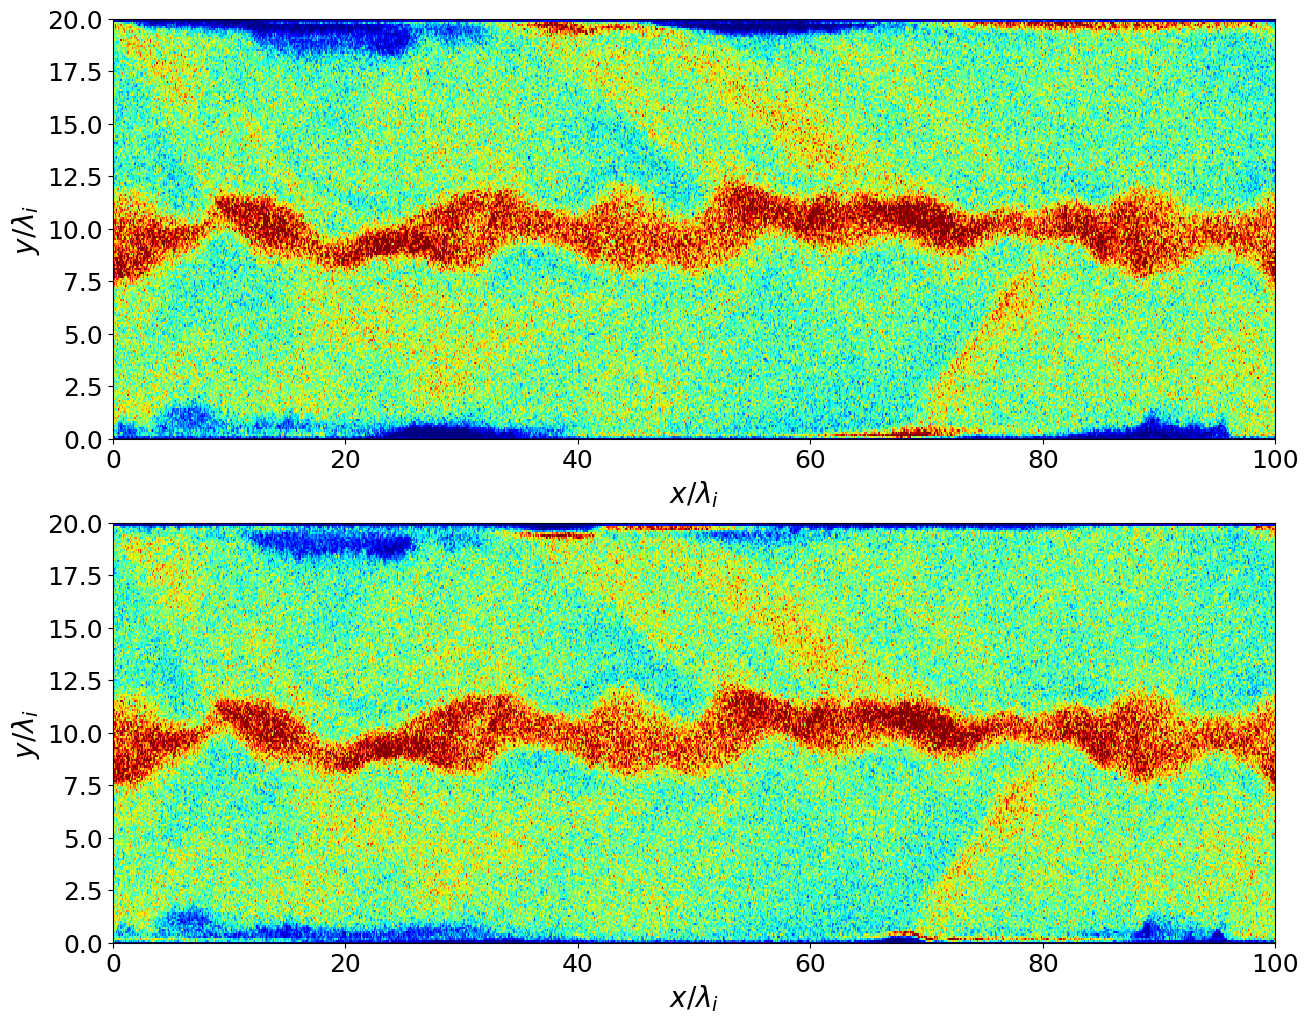

In [73]:
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

X, Y = np.meshgrid(x_coordinate, y_coordinate) / ion_inertial_length

dirname = "results_outflow"
step = 25000
filename = f"{dirname}/outflow_zeroth_moment_ion_{step}.bin"
with open(filename, 'rb') as f:
    zeroth_moment_ion = np.fromfile(f, dtype=np.float32)
zeroth_moment_ion = zeroth_moment_ion.reshape(n_x, n_y).T
filename = f"{dirname}/outflow_zeroth_moment_electron_{step}.bin"
with open(filename, 'rb') as f:
    zeroth_moment_electron = np.fromfile(f, dtype=np.float32)
zeroth_moment_electron = zeroth_moment_electron.reshape(n_x, n_y).T

mappable = ax1.pcolormesh(X, Y, zeroth_moment_ion/n_i, cmap='jet', vmin=0, vmax=2)
ax1.set_xlabel('$x / \lambda_i$', fontsize=20)
ax1.set_ylabel('$y / \lambda_i$', fontsize=20)
ax1.set_xlim(0.0, x_max/ion_inertial_length)
ax1.set_ylim(0, y_max/ion_inertial_length)
ax1.tick_params(labelsize=18)

mappable = ax2.pcolormesh(X, Y, zeroth_moment_electron/n_e, cmap='jet', vmin=0, vmax=2)
ax2.set_xlabel('$x / \lambda_i$', fontsize=20)
ax2.set_ylabel('$y / \lambda_i$', fontsize=20)
ax2.set_xlim(0.0, x_max/ion_inertial_length)
ax2.set_ylim(0, y_max/ion_inertial_length)
ax2.tick_params(labelsize=18)

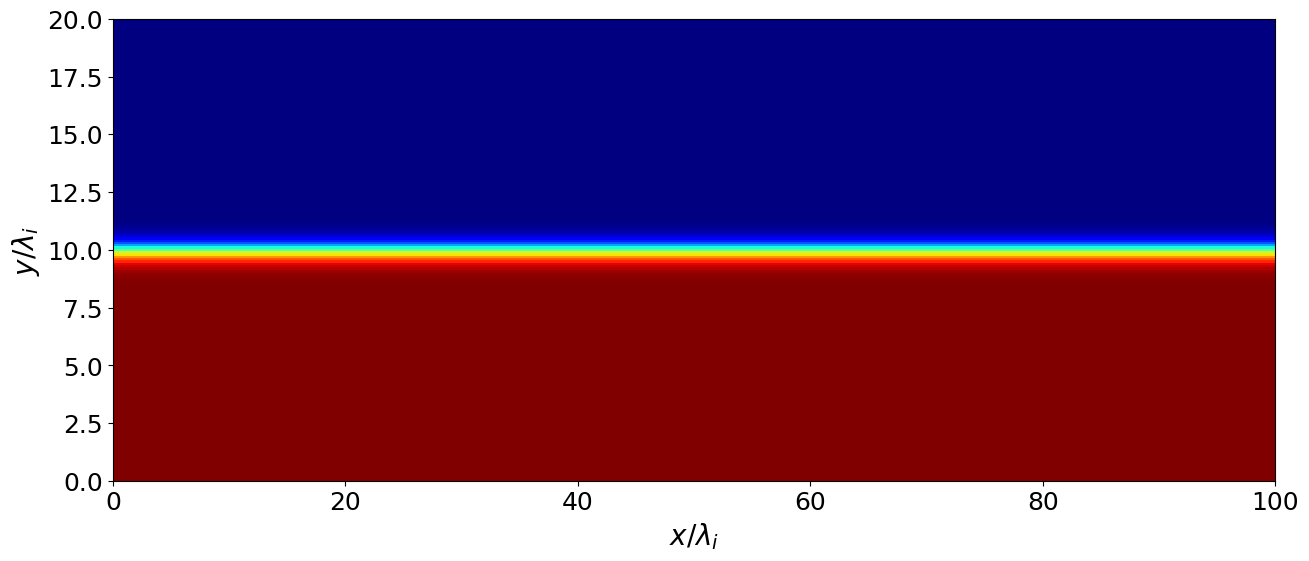

In [72]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

X, Y = np.meshgrid(x_coordinate, y_coordinate) / ion_inertial_length

dirname = "results_outflow"
step = 0
filename = f"{dirname}/outflow_B_{step}.bin"
with open(filename, 'rb') as f:
    B = np.fromfile(f, dtype=np.float32)
B = B.reshape(n_x, n_y, 3).T

mappable = ax.pcolormesh(X, Y, B[0]/B0, cmap='jet')
ax.set_xlabel('$x / \lambda_i$', fontsize=20)
ax.set_ylabel('$y / \lambda_i$', fontsize=20)
ax.set_xlim(0.0, x_max/ion_inertial_length)
ax.set_ylim(0.0, y_max/ion_inertial_length)
ax.tick_params(labelsize=18)

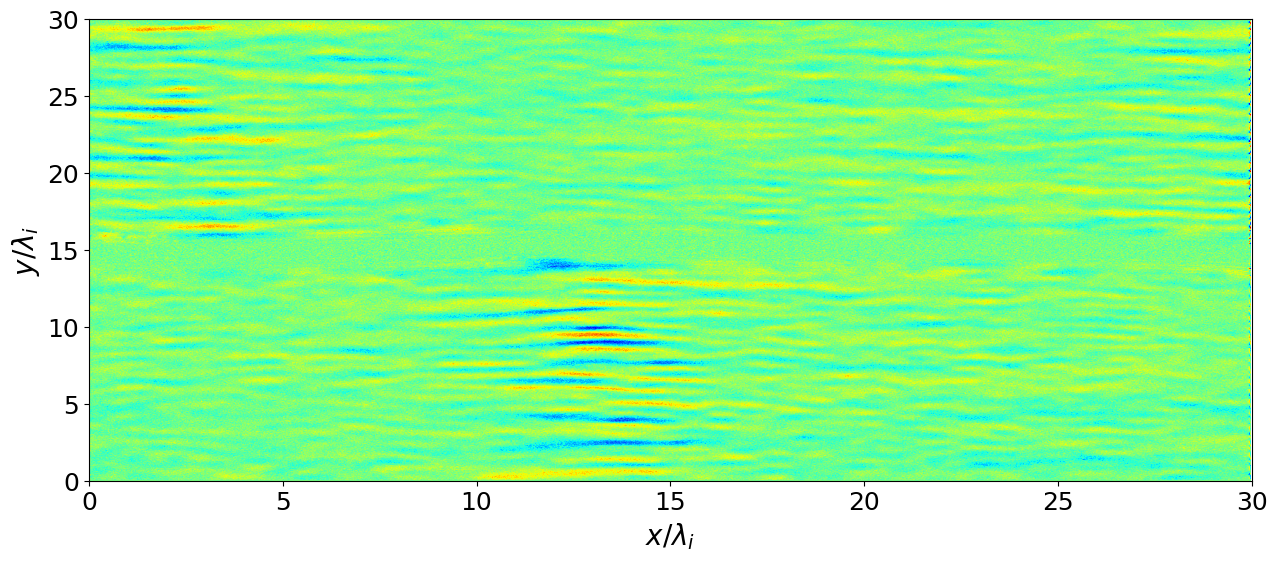

In [24]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

X, Y = np.meshgrid(x_coordinate, y_coordinate) / ion_inertial_length

dirname = "results_outflow"
step = 100000
filename = f"{dirname}/outflow_E_{step}.bin"
with open(filename, 'rb') as f:
    E = np.fromfile(f, dtype=np.float32)
E = E.reshape(n_x, n_y, 3).T

mappable = ax.pcolormesh(X, Y, E[0], cmap='jet')
ax.set_xlabel('$x / \lambda_i$', fontsize=20)
ax.set_ylabel('$y / \lambda_i$', fontsize=20)
ax.set_xlim(0.0, x_max/ion_inertial_length)
ax.set_ylim(0.0, y_max/ion_inertial_length)
ax.tick_params(labelsize=18)

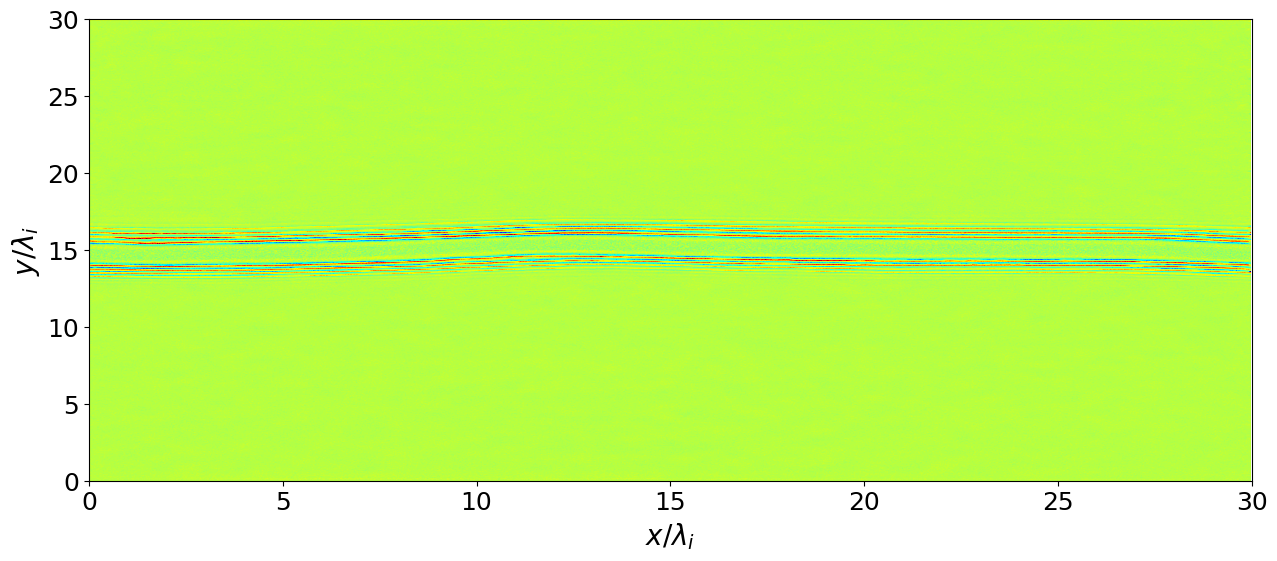

In [27]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

X, Y = np.meshgrid(x_coordinate, y_coordinate) / ion_inertial_length

dirname = "results_outflow"
step = 100000
filename = f"{dirname}/outflow_current_{step}.bin"
with open(filename, 'rb') as f:
    current = np.fromfile(f, dtype=np.float32)
current = current.reshape(n_x, n_y, 3).T

mappable = ax.pcolormesh(X, Y, current[2], cmap='jet')
ax.set_xlabel('$x / \lambda_i$', fontsize=20)
ax.set_ylabel('$y / \lambda_i$', fontsize=20)
ax.set_xlim(0.0, x_max/ion_inertial_length)
ax.set_ylim(0.0, y_max/ion_inertial_length)
ax.tick_params(labelsize=18)

In [ ]:
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(212)

dirname = "results"
file_num = 2000

if True:
    X, Y = np.meshgrid(x_coordinate, y_coordinate - y_max/2) / ion_inertial_length
    start_y_enlarged = np.arange(-10.0, 10.0+0.1, 1)
    start_points_enlarged = np.array([np.zeros(start_y_enlarged.shape), start_y_enlarged])
    start_y = np.arange(-y_max/2/ion_inertial_length, y_max/2/ion_inertial_length, 5)
    start_points = np.array([np.zeros(start_y.shape), start_y])

    zeroth_moment_ion = np.loadtxt(f'{dirname}/mr2008_zeroth_moment_ion_{file_num}.txt', delimiter=',').reshape(n_x, n_y)
    zeroth_moment_electron = np.loadtxt(f'{dirname}/mr2008_zeroth_moment_electron_{file_num}.txt', delimiter=',').reshape(n_x, n_y)
    B = np.loadtxt(f'{dirname}/mr2008_B_{file_num}.txt', delimiter=',').reshape(3, n_x, n_y)

    mappable = ax1.pcolormesh(X, Y, zeroth_moment_ion.T / n_i, cmap='jet', vmin=0.0, vmax=2.0)
    cbar = fig.colorbar(mappable, ax=ax1, pad=0.02, shrink=0.9, aspect=10, ticks=np.arange(0.0, 2.1, 0.5))
    cbar.set_label(r'$n_i / n_{i0}$', fontsize=24)
    cbar.ax.tick_params(labelsize=20)
    ax1.streamplot(X, Y, B[0, :, :].T, B[1, :, :].T, broken_streamlines=False, 
                start_points=start_points_enlarged.T, color='white', density = 100, linewidth=1, arrowsize=0)
    ax1.set_xlabel('$x / \lambda_i$', fontsize=20)
    ax1.set_ylabel('$y / \lambda_i$', fontsize=20)
    ax1.set_xlim(0.0, x_max/ion_inertial_length+0.1)
    ax1.set_ylim(-y_max/2/ion_inertial_length, y_max/2/ion_inertial_length + 0.1)
    ax1.tick_params(labelsize=18)
    ax1.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
    ax1.text(0.5, 1.05, str(int(file_num/(1.0/omega_ci/dt))) + r"$ \: \Omega_{ci}^{-1}$", ha='center', transform=ax1.transAxes, fontsize=32)


    mappable = ax2.pcolormesh(X, Y, zeroth_moment_electron.T / n_e, cmap='jet', vmin=0.0, vmax=2.0)
    cbar = fig.colorbar(mappable, ax=ax2, pad=0.02, shrink=0.9, aspect=10, ticks=np.arange(0.0, 2.1, 0.5))
    cbar.set_label(r'$n_e / n_{e0}$', fontsize=24)
    cbar.ax.tick_params(labelsize=20)
    ax2.streamplot(X, Y, B[0, :, :].T, B[1, :, :].T, broken_streamlines=False, 
                start_points=start_points_enlarged.T, color='white', density = 100, linewidth=1, arrowsize=0)
    ax2.set_xlabel('$x / \lambda_i$', fontsize=20)
    ax2.set_ylabel('$y / \lambda_i$', fontsize=20)
    ax2.set_xlim(0.0, x_max/ion_inertial_length+0.1)
    ax2.set_ylim(-y_max/2/ion_inertial_length, y_max/2/ion_inertial_length + 0.1)
    ax2.tick_params(labelsize=18)
    ax2.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])

plt.show()

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(111)

interval = 100
total_steps = 20000
dirname = "results_mr=9"

X, Y = np.meshgrid(x_coordinate, y_coordinate - y_max/2) / ion_inertial_length
start_y_enlarged = np.arange(-y_max/2/ion_inertial_length+5, y_max/2/ion_inertial_length-5+0.1, 2.5)
start_points_enlarged = np.array([np.zeros(start_y_enlarged.shape), start_y_enlarged])
start_y = np.arange(-y_max/2/ion_inertial_length, y_max/2/ion_inertial_length, 5)
start_points = np.array([np.zeros(start_y.shape), start_y])

for step in range(0, total_steps+1, interval):
    ax1.clear()

    zeroth_moment_ion = np.loadtxt(f'{dirname}/mr2008_zeroth_moment_ion_{step}.txt', delimiter=',').reshape(n_x, n_y)
    B = np.loadtxt(f'{dirname}/mr2008_B_{step}.txt', delimiter=',').reshape(3, n_x, n_y)

    if step == 0:
        mappable = ax1.pcolormesh(X, Y, zeroth_moment_ion.T / n_i, cmap='jet', vmin=0.0, vmax=2.0)
        cbar = fig.colorbar(mappable, ax=ax1, pad=0.02, shrink=0.9, aspect=10, ticks=np.arange(0.0, 2.1, 0.5))
        cbar.set_label(r'$n_i / n_{i0}$', fontsize=24)
        cbar.ax.tick_params(labelsize=20)
    else:
        ax1.pcolormesh(X, Y, zeroth_moment_ion.T / n_i, cmap='jet', vmin=0.0, vmax=2.0)

    ax1.streamplot(X, Y, B[0, :, :].T, B[1, :, :].T, broken_streamlines=False, 
                  start_points=start_points_enlarged.T, color='white', density = 100, linewidth=2, arrowsize=0)
    ax1.set_xlabel('$x / \lambda_i$', fontsize=20)
    ax1.set_ylabel('$y / \lambda_i$', fontsize=20)
    ax1.set_xlim(0.0, x_max/ion_inertial_length+0.1)
    ax1.set_ylim(-20.0, 20.0+0.1)
    ax1.tick_params(labelsize=18)
    ax1.set_yticks([-20.0, -10.0, 0.0, 10.0, 20.0])
    ax1.text(0.5, 1.05, f"{step * dt * omega_ci:.2f}" + r"$ \: \Omega_{ci}^{-1}$", ha='center', transform=ax1.transAxes, fontsize=32)

    fig.savefig(f'./pictures/{step}.png', dpi=200)
    

In [ ]:
filename = "mr2008_mr=9.mp4"

img = cv2.imread(f'./pictures/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 5.0

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=filename, fourcc=fourcc, fps=fps, frameSize=framesize)

for step in range(0, total_steps, interval):
    img = cv2.imread(f'./pictures/{step}.png')
    video.write(img)
video.release()

##################################################

In [ ]:
number_of_results = 16
kinetic_energy = np.zeros(number_of_results)
electric_field_energy = np.zeros(number_of_results)
magnetic_field_energy = np.zeros(number_of_results)
t = np.arange(0, number_of_results*int(2/omega_ci/dt), int(2/omega_ci/dt))
dirname = "results"

for j in range(number_of_results):
        
    energy_E = np.loadtxt(f"{dirname}/mr2008_energy_E_{int(2/omega_ci/dt)*5*j}.csv")
    energy_B = np.loadtxt(f"{dirname}/mr2008_energy_B_{int(2/omega_ci/dt)*5*j}.csv")
    KE = np.loadtxt(f"{dirname}/mr2008_KE_{int(2/omega_ci/dt)*5*j}.csv")
    kinetic_energy[j] = KE
    electric_field_energy[j] = energy_E
    magnetic_field_energy[j] = energy_B
    print(f"{j} done...")

total_energy = kinetic_energy + electric_field_energy + magnetic_field_energy
print(total_energy[-1] / total_energy[0])

In [ ]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(t*omega_ci, kinetic_energy, label='Kinetic Energy')
ax.plot(t*omega_ci, electric_field_energy, label='Electric Field Energy')
ax.plot(t*omega_ci, magnetic_field_energy, label='Magnetic Field Energy')
ax.plot(t*omega_ci, total_energy, label='Total Energy', ls='--')
ax.legend(loc='lower right', fontsize=18)
#ax.set_ylim(1e5)
#ax.set_xlim(0.0, number_of_results*5000*omega_ci)
ax.set_xlabel('$\Omega_{ci} t$', fontsize=20)
ax.set_ylabel('Energy', fontsize=20)
ax.tick_params(labelsize=20)
plt.show()
fig.savefig('test.png')

In [ ]:
number_of_results = 16
div_B = np.zeros(number_of_results)
div_E = np.zeros(number_of_results)
t = np.arange(0, number_of_results*int(2/omega_ci/dt), int(2/omega_ci/dt))
dirname = "mr2008"

for j in range(number_of_results):  
    div_B[j] = np.loadtxt(f"{dirname}/mr2008_div_B_error_{int(2/omega_ci/dt)*5*j}.csv")
    div_E[j] = np.loadtxt(f"{dirname}/mr2008_div_E_error_{int(2/omega_ci/dt)*5*j}.csv")
    

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(t*omega_ci, div_B/n_x/n_y, label=r'$\nabla \cdot \mathrm{B}$')
ax.plot(t*omega_ci, div_E/n_x/n_y/q_unit, label=r'$\nabla \cdot \mathrm{E} - \rho$')
ax.set_ylim(1e-10, 1e1)
#ax.set_xlim(0.0, number_of_results*5000*omega_ci)
ax.set_xlabel('$\Omega_{ci} t$', fontsize=20)
ax.set_ylabel('Maximum Error', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_yscale('log')
ax.legend(loc='upper right', fontsize=20)
fig.savefig("error2.png", dpi=200)